In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/KeithGalli/matplotlib_tutorial/master/fifa_data.csv")

In [6]:
df2=df[df["Position"]=='GK']
df2.sort_values(by="Overall")
df2.reset_index(inplace=True)
df2.head()

,index,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
1,9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M
2,18,18,192448,M. ter Stegen,26,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M
3,19,19,192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M
4,22,22,167495,M. Neuer,32,https://cdn.sofifa.org/players/4/19/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,89,89,...,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,€62.7M


In [22]:
cdf=df2[['Overall','GKReflexes','GKDiving','GKPositioning']]
cdf

,Overall,GKReflexes,GKDiving,GKPositioning
0,91,94.0,90.0,88.0
1,90,89.0,86.0,88.0
2,89,90.0,87.0,85.0
3,89,88.0,85.0,86.0
4,89,87.0,90.0,87.0
...,...,...,...,...
2020,48,51.0,47.0,45.0
2021,48,45.0,45.0,50.0
2022,48,46.0,45.0,49.0
2023,47,44.0,52.0,40.0


In [24]:
msk=np.random.rand(len(df2))<0.8
train=cdf[msk]
test=cdf[~msk]

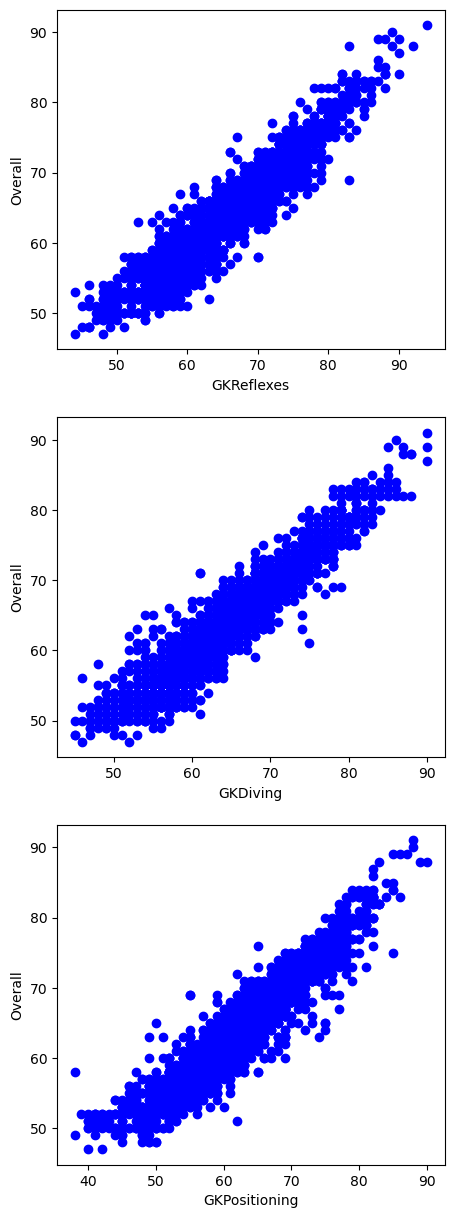

In [26]:
fig, axes = plt.subplots(3, figsize=(5, 15))
ax=axes [0]
ax.scatter(cdf.GKReflexes,cdf.Overall, color='blue')
ax.set_xlabel('GKReflexes')
ax.set_ylabel('Overall')

ax=axes[1]
ax.scatter(cdf.GKDiving,cdf.Overall, color='blue')
ax.set_xlabel('GKDiving')
ax.set_ylabel('Overall')

ax=axes[2]
ax.scatter(cdf.GKPositioning,cdf.Overall, color='blue')
ax.set_xlabel('GKPositioning')
ax.set_ylabel('Overall')
plt.show()



In [36]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['GKReflexes','GKDiving','GKPositioning']])
train_y=np.asanyarray(train[['Overall']])
regr.fit(train_x,train_y)
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[0.27899674 0.30588989 0.37396893]]
Intercept:  [2.60807332]


In [49]:
from sklearn.metrics import r2_score

test_x=np.asanyarray(test[['GKReflexes','GKDiving','GKPositioning']])
test_y=np.asanyarray(test[["Overall"]])
test_y_=regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_-test_y)))
print("Residual sum of squares (MSE): %.2F" %np.mean((test_y_-test_y)**2))
print("R2-score: %.2f" % r2_score(test_y,test_y_))

Mean absolute error: 0.87
Residual sum of squares (MSE): 1.33
R2-score: 0.98
